# Week 5 Examples

## Example KNN

In [1]:
import pandas as pd

myData = pd.read_excel('../data/UniversalBank.xlsx', sheet_name = 'UniversalBank')

myData.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [36]:
myData["Personal Loan"].value_counts(normalize=True)

Personal Loan
0    0.904
1    0.096
Name: proportion, dtype: float64

In [2]:
myData.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [3]:
myData = myData.drop(['ID', 'ZIP Code'], axis=1)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(myData.drop('Personal Loan', axis = 1), 
                                                    myData['Personal Loan'], 
                                                    test_size = 0.30, 
                                                    random_state = 321)

In [5]:
len(X_train)

3500

In [6]:
len(X_test)

1500

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

dataScaler = scaler.fit(myData.drop('Personal Loan', axis = 1))

In [8]:
X_train_std = dataScaler.transform(X_train)

X_test_std = dataScaler.transform(X_test)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier()

In [10]:
paramGrid = {'n_neighbors': range(1, 10 + 1)}

In [11]:
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(KNN_model, 
                      paramGrid, 
                      cv = 10, 
                      scoring = 'accuracy')

In [12]:
KNN_fit = search.fit(X_train_std, y_train)

pd.DataFrame(KNN_fit.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005781,0.001661,0.016314,0.001326,1,{'n_neighbors': 1},0.957143,0.954286,0.957143,0.945714,0.957143,0.962857,0.960000,0.954286,0.960000,0.957143,0.956571,0.004389,3
1,0.004578,0.000506,0.016434,0.001243,2,{'n_neighbors': 2},0.945714,0.954286,0.957143,0.948571,0.948571,0.954286,0.957143,0.954286,0.948571,0.942857,0.951143,0.004686,6
2,0.004591,0.000301,0.016350,0.001028,3,{'n_neighbors': 3},0.960000,0.962857,0.971429,0.948571,0.960000,0.951429,0.965714,0.962857,0.957143,0.960000,0.960000,0.006260,1
3,0.004861,0.000473,0.019508,0.001947,4,{'n_neighbors': 4},0.945714,0.948571,0.965714,0.951429,0.951429,0.945714,0.957143,0.965714,0.948571,0.945714,0.952571,0.007362,5
4,0.004544,0.000582,0.018311,0.001228,5,{'n_neighbors': 5},0.957143,0.960000,0.968571,0.948571,0.954286,0.954286,0.960000,0.962857,0.948571,0.957143,0.957143,0.005855,2
5,0.004675,0.000298,0.018670,0.000875,6,{'n_neighbors': 6},0.940000,0.951429,0.960000,0.948571,0.948571,0.960000,0.954286,0.957143,0.937143,0.940000,0.949714,0.008000,7
6,0.004893,0.000463,0.020423,0.001168,7,{'n_neighbors': 7},0.951429,0.951429,0.965714,0.948571,0.951429,0.960000,0.954286,0.962857,0.942857,0.951429,0.954000,0.006571,4
7,0.005069,0.000671,0.021152,0.001224,8,{'n_neighbors': 8},0.945714,0.948571,0.957143,0.945714,0.937143,0.954286,0.951429,0.960000,0.934286,0.940000,0.947429,0.008101,9
8,0.004882,0.000613,0.021457,0.002253,9,{'n_neighbors': 9},0.951429,0.948571,0.960000,0.948571,0.945714,0.948571,0.957143,0.957143,0.931429,0.940000,0.948857,0.008127,8
9,0.005576,0.000775,0.023901,0.002399,10,{'n_neighbors': 10},0.951429,0.945714,0.957143,0.940000,0.948571,0.951429,0.954286,0.960000,0.934286,0.931429,0.947429,0.009053,9


In [13]:
pd.DataFrame(KNN_fit.cv_results_).sort_values('rank_test_score')[['param_n_neighbors', 'mean_test_score', 'rank_test_score']]

,param_n_neighbors,mean_test_score,rank_test_score
2,3,0.960000,1
4,5,0.957143,2
0,1,0.956571,3
6,7,0.954000,4
3,4,0.952571,5
1,2,0.951143,6
5,6,0.949714,7
8,9,0.948857,8
7,8,0.947429,9
9,10,0.947429,9


In [14]:
KNN_fit.best_estimator_

KNeighborsClassifier(n_neighbors=3)

In [15]:
testPredictions = KNN_fit.predict(X_test_std)

In [16]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, testPredictions)

array([[1357,    5],
       [  59,   79]])

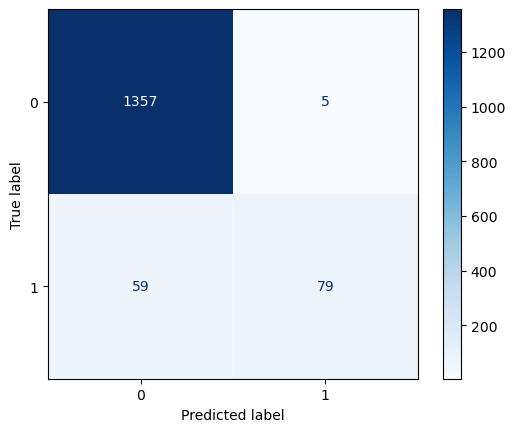

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(KNN_fit, 
                                      X_test_std, 
                                      y_test, 
                                      cmap = plt.cm.Blues);

In [18]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, testPredictions)

0.9573333333333334

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, testPredictions, target_names = ['Did Not Apply', 'Applied for Personal Loan'], digits=4))

                           precision    recall  f1-score   support

            Did Not Apply     0.9583    0.9963    0.9770      1362
Applied for Personal Loan     0.9405    0.5725    0.7117       138

                 accuracy                         0.9573      1500
                macro avg     0.9494    0.7844    0.8443      1500
             weighted avg     0.9567    0.9573    0.9526      1500



In [20]:
testPredictionProbs = KNN_fit.predict_proba(X_test_std)

testPredictionProbs[:10,]

array([[0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [21]:
y_test.value_counts()

Personal Loan
0    1362
1     138
Name: count, dtype: int64

In [22]:
import numpy as np

testPredsCustomCutoff = np.where(testPredictionProbs[:, 1] > 0.20, 1, 0)

testPredsCustomCutoff[:10]

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [23]:
confusion_matrix(y_test, testPredsCustomCutoff)

array([[1315,   47],
       [  23,  115]])

In [24]:
accuracy_score(y_test, testPredsCustomCutoff)

0.9533333333333334

In [25]:
print(classification_report(y_test, testPredsCustomCutoff, target_names = ['Did Not Apply', 'Applied for Personal Loan'], digits = 4))

                           precision    recall  f1-score   support

            Did Not Apply     0.9828    0.9655    0.9741      1362
Applied for Personal Loan     0.7099    0.8333    0.7667       138

                 accuracy                         0.9533      1500
                macro avg     0.8463    0.8994    0.8704      1500
             weighted avg     0.9577    0.9533    0.9550      1500



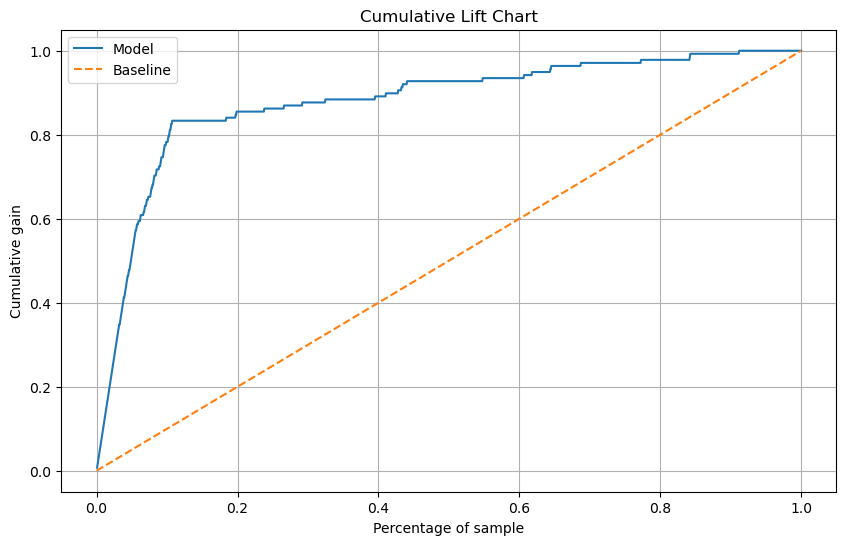

(Text(0.5, 1.0, 'Cumulative Lift Chart'),
 Text(0.5, 24.0, 'Percentage of sample'),
 Text(24.000000000000007, 0.5, 'Cumulative gain'),
 None,
 None)

In [ ]:
# Key Question: Is my model better than random selection?
import matplotlib.pyplot as plt

testOutcomes = pd.DataFrame({'Actuals': y_test, 'Probs': testPredictionProbs[:,1]})
data = testOutcomes.sort_values(by='Probs', ascending=False).reset_index(drop=True)

# Calculate cumulative gains
data['cumulative_positives'] = data['Actuals'].cumsum()
total_positives = data['Actuals'].sum()
data['cumulative_gain'] = data['cumulative_positives'] / total_positives
data['percentage_population'] = (np.arange(1, len(data) + 1) / len(data))

# Plot cumulative lift chart
plt.figure(figsize=(10, 6))
plt.plot(data['percentage_population'], data['cumulative_gain'], label='Model')
plt.plot([0, 1], [0, 1], linestyle='--', label='Baseline')
plt.title('Cumulative Lift Chart'), plt.xlabel('Percentage of sample'), plt.ylabel('Cumulative gain'), plt.legend(), plt.grid(), plt.show()

In [27]:
testOutcomes = pd.DataFrame({
    'Actuals': y_test,
    'Probs': testPredictionProbs[:, 1]
})

In [28]:
testOutcomes.head()

,Actuals,Probs
2041,1,0.333333
2607,0,0.000000
4675,0,0.000000
4629,0,0.666667
4615,0,0.000000


In [29]:
cuts = pd.qcut(testOutcomes.Probs, q = 10, duplicates = 'drop')

In [30]:
lifts = (testOutcomes.groupby(cuts)['Actuals'].sum() / cuts.value_counts()) / np.mean(testOutcomes.Actuals)

<positron-console-cell-30>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


In [31]:
plotDat = pd.DataFrame({
    'Lift': np.round(lifts, 3),
    'N': cuts.value_counts()
})
plotDat['Cumulative N'] = np.cumsum(np.flip(plotDat.N))
plotDat['Cumulative Percentile'] = round(plotDat['Cumulative N'] / len(testOutcomes) * 100, 0).astype('int')

plotDat

,Lift,N,Cumulative N,Cumulative Percentile
Probs,,,,
"(-0.001, 0.333]",0.453,1416,1500,100
"(0.333, 1.0]",10.223,84,84,6


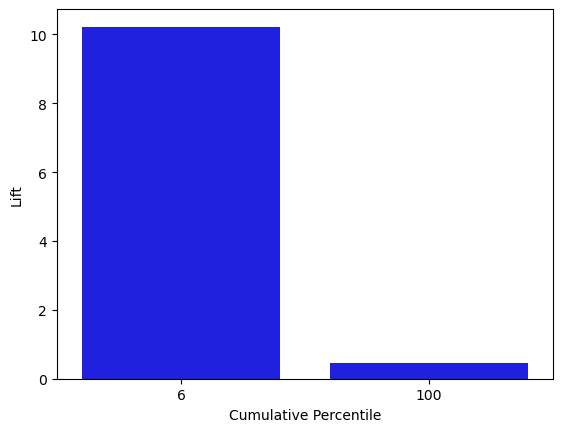

In [ ]:
# Decilewise Lift Chart

import seaborn as sns

sns.barplot(y = 'Lift', 
            x = 'Cumulative Percentile', 
            data = plotDat, 
            color = 'blue')

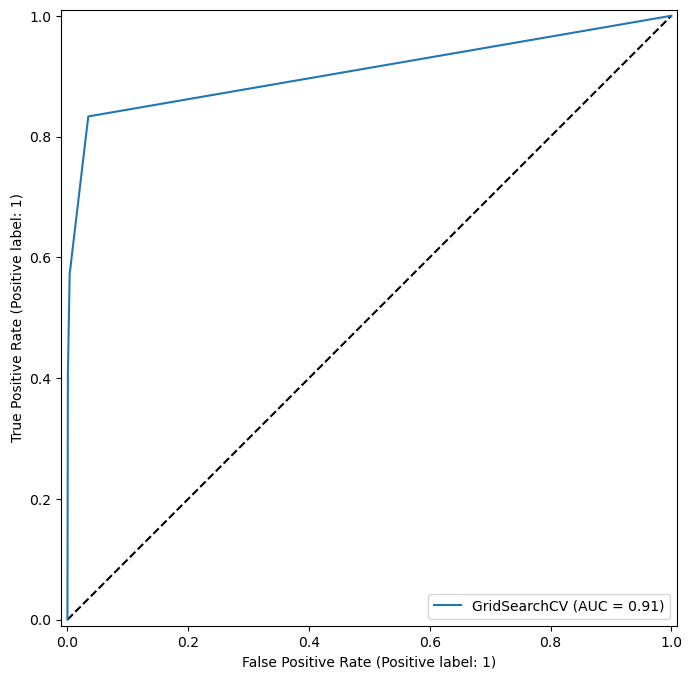

In [ ]:
# ROC. Can overlay multiple curves.
# AUC; Area Under Curve. Optimal: 1.0
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(figsize = (8, 8))

ax.plot(ax.get_xlim(), ax.get_ylim(), ls = '--', c = 'k')
RocCurveDisplay.from_estimator(KNN_fit, 
                               X = X_test_std, 
                               y = y_test, 
                               ax = ax)

In [34]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, testPredictionProbs[:, 1])

np.float64(0.9082950264955628)

In [38]:
myScoreData = pd.read_excel('../data/UniversalBank.xlsx', sheet_name = 'NewCustomers')

myScoreData_std = dataScaler.transform(myScoreData)

KNN_Scores = KNN_fit.predict(myScoreData_std)

In [39]:
KNN_Probs = KNN_fit.predict_proba(myScoreData_std)

KNN_Probs[:10,]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [40]:
myScoreData['KNN_Score'] = KNN_Scores
myScoreData['KNN_Prob'] = KNN_Probs[:, 1]

myScoreData

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,KNN_Score,KNN_Prob
0,25,1,49,4,1.6,1,0,1,0,0,0,0,0.0
1,45,19,34,3,1.5,1,0,1,0,0,0,0,0.0
2,39,15,11,1,1.0,1,0,0,0,0,0,0,0.0
3,35,9,100,1,2.7,2,0,0,0,0,0,0,0.0
4,35,8,45,4,1.0,2,0,0,0,0,1,0,0.0
5,37,13,29,4,0.4,2,155,0,0,1,0,0,0.0
6,53,27,72,2,1.5,2,0,0,0,1,0,0,0.0
7,50,24,22,1,0.3,3,0,0,0,0,1,0,0.0
8,35,10,81,3,0.6,2,104,0,0,1,0,0,0.0
9,34,9,180,1,8.9,3,0,0,0,0,0,1,1.0


In [41]:
myScoreData.tail()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,KNN_Score,KNN_Prob
15,60,30,22,1,1.5,3,0,0,0,1,1,0,0.0
16,38,14,130,4,4.7,3,134,0,0,0,0,1,1.0
17,42,18,81,4,2.4,1,0,0,0,0,0,0,0.0
18,46,21,193,2,8.1,3,0,0,0,0,0,1,1.0
19,55,28,21,1,0.5,2,0,1,0,0,1,0,0.0


## naive Bayes Example

In [ ]:
import pandas as pd

myData = pd.read_excel('../data/UniversalBank.xlsx', sheet_name = 'UniversalBank')
myData.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
myData = myData.drop(['ID', 'ZIP Code'], axis=1)

In [ ]:
myData.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
myData['Age_C'], bins_Age = pd.qcut(myData.Age, q = 5, labels = [1,2,3,4,5], retbins=True)
myData['Experience_C'], bins_Experience = pd.qcut(myData.Experience, q = 5, labels = [1,2,3,4,5], retbins=True)
myData['Income_C'], bins_Income = pd.qcut(myData.Income, q = 5, labels = [1,2,3,4,5], retbins=True)
myData['CCAvg_C'], bins_CCAvg = pd.qcut(myData.CCAvg, q = 5, labels = [1,2,3,4,5], retbins=True)

In [ ]:
myData['Age_C'].head()

0    1
1    3
2    2
3    2
4    2
Name: Age_C, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [ ]:
bins_Age

array([23., 34., 42., 50., 57., 67.])

In [ ]:
import numpy as np
myData['Mortgage_C'] = np.where(myData['Mortgage'] == 0, 0, 1)

In [ ]:
myData.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Age_C,Experience_C,Income_C,CCAvg_C,Mortgage_C
0,25,1,49,4,1.6,1,0,0,1,0,0,0,1,1,2,3,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0,3,3,2,3,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0,2,2,1,2,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0,2,2,4,4,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1,2,1,2,2,0


In [ ]:
myData = myData.drop(['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'], axis=1)

In [ ]:
myData.head()

,Family,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,Age_C,Experience_C,Income_C,CCAvg_C,Mortgage_C
0,4,1,0,1,0,0,0,1,1,2,3,0
1,3,1,0,1,0,0,0,3,3,2,3,0
2,1,1,0,0,0,0,0,2,2,1,2,0
3,1,2,0,0,0,0,0,2,2,4,4,0
4,4,2,0,0,0,0,1,2,1,2,2,0


In [ ]:
myData = myData.astype('category')

myData.dtypes

Family                category
Education             category
Personal Loan         category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
Age_C                 category
Experience_C          category
Income_C              category
CCAvg_C               category
Mortgage_C            category
dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(myData.drop('Personal Loan', axis = 1), 
                                                    myData['Personal Loan'], 
                                                    test_size = 0.30, 
                                                    random_state = 321)

In [ ]:
len(X_train)

3500

In [ ]:
len(X_test)

1500

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

dataEncoder = encoder.fit(myData.drop('Personal Loan', axis = 1))

X_train_encoded = dataEncoder.transform(X_train)

X_test_encoded = dataEncoder.transform(X_test)

In [ ]:
X_train_encoded

array([[3., 0., 0., ..., 1., 1., 0.],
       [2., 1., 0., ..., 2., 3., 0.],
       [2., 1., 1., ..., 2., 4., 0.],
       ...,
       [3., 1., 0., ..., 4., 4., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [3., 2., 1., ..., 1., 0., 0.]])

In [ ]:
from sklearn.naive_bayes import CategoricalNB

nb_model = CategoricalNB()

In [ ]:
paramGrid = {'fit_prior': [True, False]}

In [ ]:
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(nb_model, 
                      paramGrid, 
                      cv = 10, 
                      scoring = 'accuracy')

In [ ]:
nb_fit = search.fit(X_train_encoded, y_train)

pd.DataFrame(nb_fit.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_fit_prior,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001582,0.004745,0.001566,0.004698,True,{'fit_prior': True},0.942857,0.945714,0.911429,0.957143,0.940000,0.940000,0.934286,0.908571,0.922857,0.945714,0.934857,0.014945,1
1,0.003520,0.006314,0.000000,0.000000,False,{'fit_prior': False},0.885714,0.897143,0.857143,0.908571,0.874286,0.894286,0.860000,0.837143,0.848571,0.888571,0.875143,0.022280,2


In [ ]:
pd.DataFrame(nb_fit.cv_results_).sort_values('rank_test_score')[['params', 'mean_test_score', 'rank_test_score']]

,params,mean_test_score,rank_test_score
0,{'fit_prior': True},0.934857,1
1,{'fit_prior': False},0.875143,2


In [ ]:
testPredictions = nb_fit.predict(X_test_encoded)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, testPredictions)

array([[1318,   44],
       [  59,   79]], dtype=int64)

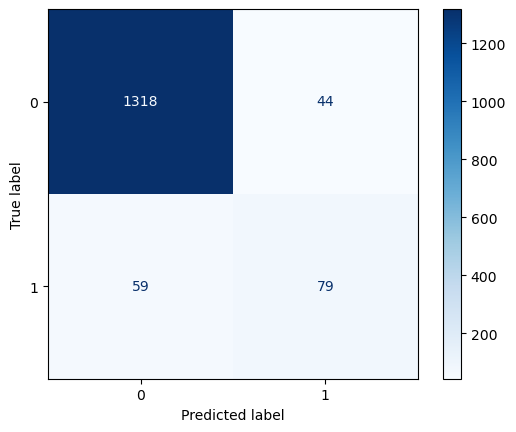

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(nb_fit, 
                                      X_test_encoded, 
                                      y_test, 
                                      cmap = plt.cm.Blues);

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, testPredictions)

0.9313333333333333

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, testPredictions, target_names = ['Did Not Apply', 'Applied for Personal Loan'], digits = 4))

                           precision    recall  f1-score   support

            Did Not Apply     0.9572    0.9677    0.9624      1362
Applied for Personal Loan     0.6423    0.5725    0.6054       138

                 accuracy                         0.9313      1500
                macro avg     0.7997    0.7701    0.7839      1500
             weighted avg     0.9282    0.9313    0.9295      1500



In [ ]:
testPredictionProbs = nb_fit.predict_proba(X_test_encoded)

import numpy as np

testPredsCustomCutoff = np.where(testPredictionProbs[:, 1] > 0.20, 1, 0)

confusion_matrix(y_test, testPredsCustomCutoff)

array([[1241,  121],
       [  36,  102]], dtype=int64)

In [ ]:
accuracy_score(y_test, testPredsCustomCutoff)

0.8953333333333333

In [ ]:
print(classification_report(y_test, testPredsCustomCutoff, target_names = ['Did Not Apply', 'Applied for Personal Loan'], digits = 4))

                           precision    recall  f1-score   support

            Did Not Apply     0.9718    0.9112    0.9405      1362
Applied for Personal Loan     0.4574    0.7391    0.5651       138

                 accuracy                         0.8953      1500
                macro avg     0.7146    0.8251    0.7528      1500
             weighted avg     0.9245    0.8953    0.9060      1500



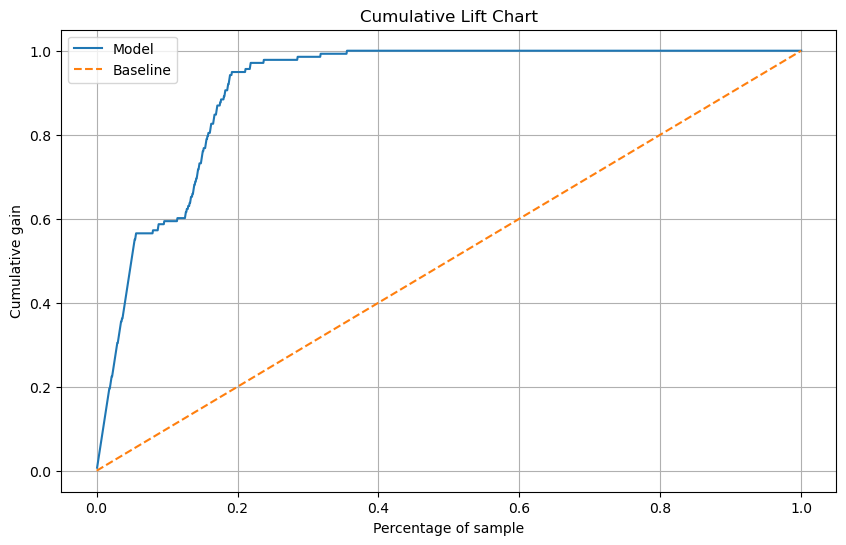

(Text(0.5, 1.0, 'Cumulative Lift Chart'),
 Text(0.5, 24.0, 'Percentage of sample'),
 Text(24.000000000000007, 0.5, 'Cumulative gain'),
 None,
 None)

In [ ]:
import matplotlib.pyplot as plt
y_test = y_test.astype(int)
testOutcomes = pd.DataFrame({'Actuals': y_test, 'Probs': testPredictionProbs[:,1]})
data = testOutcomes.sort_values(by='Probs', ascending=False).reset_index(drop=True)
# Calculate cumulative gains
data['cumulative_positives'] = data['Actuals'].cumsum()
total_positives = data['Actuals'].sum()
data['cumulative_gain'] = data['cumulative_positives'] / total_positives
data['percentage_population'] = (np.arange(1, len(data) + 1) / len(data))
# Plot cumulative lift chart
plt.figure(figsize=(10, 6))
plt.plot(data['percentage_population'], data['cumulative_gain'], label='Model')
plt.plot([0, 1], [0, 1], linestyle='--', label='Baseline')
plt.title('Cumulative Lift Chart'), plt.xlabel('Percentage of sample'), plt.ylabel('Cumulative gain'), plt.legend(), plt.grid(), plt.show()

In [ ]:
testOutcomes = pd.DataFrame({
  'Actuals': y_test.astype('int'), # note: we convert the categorical y values back to int using astype so that we can sum them
  'Probs': testPredictionProbs[:, 1]
})

cuts = pd.qcut(testOutcomes.Probs, q = 10, duplicates = 'drop') # increasing q may alter the look of the plot
lifts = (testOutcomes.groupby(cuts)['Actuals'].sum() / cuts.value_counts()) / np.mean(testOutcomes.Actuals)

plotDat = pd.DataFrame({
  'Lift': np.round(lifts, 3),
  'N': cuts.value_counts()
})

plotDat['Cumulative N'] = np.cumsum(np.flip(plotDat.N))
plotDat['Cumulative Percentile'] = round(plotDat['Cumulative N'] / len(testOutcomes) * 100, 0).astype('int')
plotDat

C:\Users\lchen24\AppData\Local\Temp\11\ipykernel_23692\449983534.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lifts = (testOutcomes.groupby(cuts)['Actuals'].sum() / cuts.value_counts()) / np.mean(testOutcomes.Actuals)


,Lift,N,Cumulative N,Cumulative Percentile
Probs,,,,
"(-0.0009466, 0.000158]",0.000,150,1500,100
"(0.000158, 0.000301]",0.000,150,1350,90
"(0.000301, 0.000451]",0.000,150,1200,80
"(0.000451, 0.000805]",0.000,150,1050,70
"(0.000805, 0.00242]",0.000,150,900,60
"(0.00242, 0.00594]",0.000,150,750,50
"(0.00594, 0.0247]",0.145,150,600,40
"(0.0247, 0.0651]",0.362,150,450,30
"(0.0651, 0.447]",3.551,150,300,20


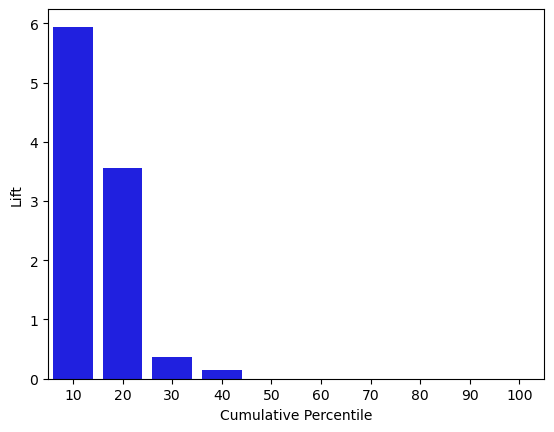

In [ ]:
import seaborn as sns

sns.barplot(y = 'Lift', 
            x = 'Cumulative Percentile', 
            data = plotDat, 
            color = 'blue');

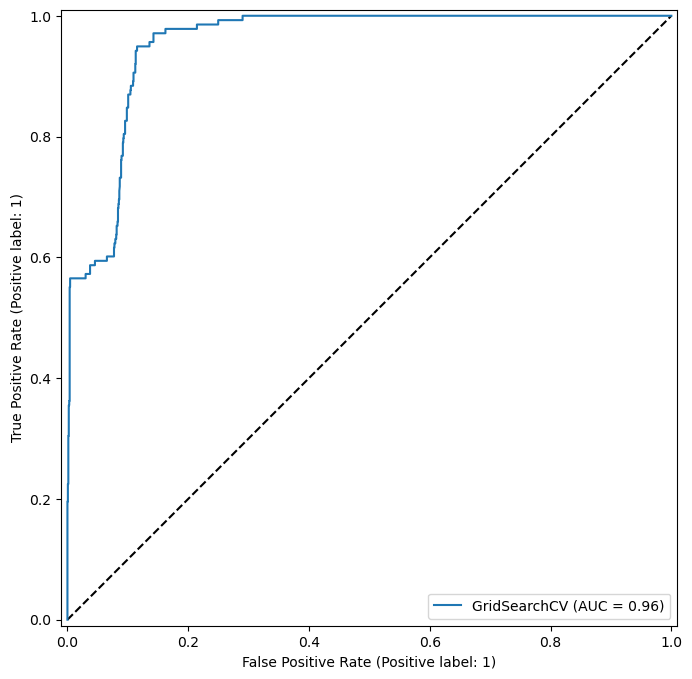

In [ ]:
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(figsize = (8, 8))

ax.plot(ax.get_xlim(), ax.get_ylim(), ls = '--', c = 'k')
RocCurveDisplay.from_estimator(nb_fit, 
                               X = X_test_encoded, 
                               y = y_test, 
                               ax = ax);


In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, testPredictionProbs[:, 1])

0.9551464172465897

In [ ]:
myScoreData = pd.read_excel('UniversalBank(4).xlsx', sheet_name = 'NewCustomers')

myScoreData

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1
5,37,13,29,4,0.4,2,155,0,0,1,0
6,53,27,72,2,1.5,2,0,0,0,1,0
7,50,24,22,1,0.3,3,0,0,0,0,1
8,35,10,81,3,0.6,2,104,0,0,1,0
9,34,9,180,1,8.9,3,0,0,0,0,0


In [ ]:
myScoreData['Age_C'] = pd.cut(myScoreData['Age'], bins=bins_Age, labels=[1,2,3,4,5], include_lowest=True)
myScoreData['Experience_C'] = pd.cut(myScoreData['Experience'], bins=bins_Experience, labels=[1,2,3,4,5], include_lowest=True)
myScoreData['Income_C'] = pd.cut(myScoreData['Income'], bins=bins_Income, labels=[1,2,3,4,5], include_lowest=True)
myScoreData['CCAvg_C'] = pd.cut(myScoreData['CCAvg'], bins=bins_CCAvg, labels=[1,2,3,4,5], include_lowest=True)

In [ ]:
import numpy as np
myScoreData['Mortgage_C'] = np.where(myScoreData['Mortgage'] == 0, 0, 1)

In [ ]:
myScoreData = myScoreData.drop(['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'], axis=1)

In [ ]:
myScoreData.head()

,Family,Education,Securities Account,CD Account,Online,CreditCard,Age_C,Experience_C,Income_C,CCAvg_C,Mortgage_C
0,4,1,1,0,0,0,1,1,2,3,0
1,3,1,1,0,0,0,3,3,2,3,0
2,1,1,0,0,0,0,2,2,1,2,0
3,1,2,0,0,0,0,2,2,4,4,0
4,4,2,0,0,0,1,2,1,2,2,0


In [ ]:
myScoreData_encoded = dataEncoder.transform(myScoreData)

nb_Scores = nb_fit.predict(myScoreData_encoded)
nb_Probs = nb_fit.predict_proba(myScoreData_encoded)

In [ ]:
myScoreData['nb_Scores'] = nb_Scores
myScoreData['nb_Probs'] = nb_Probs[:,1]

myScoreData.head()

,Family,Education,Securities Account,CD Account,Online,CreditCard,Age_C,Experience_C,Income_C,CCAvg_C,Mortgage_C,nb_Scores,nb_Probs
0,4,1,1,0,0,0,1,1,2,3,0,0,0.000192
1,3,1,1,0,0,0,3,3,2,3,0,0,0.000260
2,1,1,0,0,0,0,2,2,1,2,0,0,0.000078
3,1,2,0,0,0,0,2,2,4,4,0,0,0.024848
4,4,2,0,0,0,1,2,1,2,2,0,0,0.000481


In [ ]:
myScoreData.tail()

,Family,Education,Securities Account,CD Account,Online,CreditCard,Age_C,Experience_C,Income_C,CCAvg_C,Mortgage_C,nb_Scores,nb_Probs
15,1,3,0,0,1,1,5,4,1,3,0,0,0.000273
16,4,3,0,0,0,0,2,2,5,5,1,1,0.832947
17,4,1,0,0,0,0,2,3,4,4,0,0,0.012753
18,2,3,0,0,0,0,3,3,5,5,0,1,0.784977
19,1,2,1,0,0,1,4,4,1,1,0,0,0.000251
